In [1]:
from sympy import *
import heppackv0 as hep

Reading heppackv0.py

Done


In [2]:
s,theta=symbols('s theta',real=True)
p=symbols('p',positive=True)
u,t,s=symbols('u t s',real=True)

In [3]:
p1=[p,0,0,0]
p2=[p,0,pi,pi]
p3=[p,0,theta,0]
p4=[p,0,pi-theta,pi]

In [4]:
sCM=4*p*p;sCM

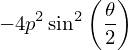

In [5]:
tCM=-sCM*sin(theta/2)**2;tCM

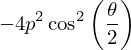

In [6]:
uCM=-sCM*cos(theta/2)**2;uCM 

## Basics
There are 4 Feynman-Diagrams: a) $t$-channel, b) $u$-channel, c) $s$-channel, d) Four-Gluon-Vertex
with their momenta and color indices:
<img src="ggtogg.jpg" width="600"/>

The color factors of the four-gluon Vertex correspond exactly to the color factors of the separate three-gluon-channels. The package heppackv0.py provides the necessary routines, which (hopefully) need no further comments.
V3gtchannel calculates e.g. the amplitude a).
There are 16 helicity amplitudes, 8 amplitudes are independent, further 8 amplitudes are related by parity invariance. As usual we omitt the coupling $g_S^2$

## The amplitudes
###  1)  $T(g_-g_+\rightarrow g_-g_-)$

In [7]:
s11=hep.V3gschannel(p1,-1,p2,1,p3,-1,p4,-1)/sCM;s11

In [8]:
s12=hep.V4gschannel(p1,-1,p2,1,p3,-1,p4,-1);s12

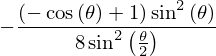

In [9]:
t11=hep.V3gtchannel(p1,-1,p2,1,p3,-1,p4,-1)/tCM;t11

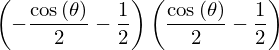

In [10]:
t12=hep.V4gtchannel(p1,-1,p2,1,p3,-1,p4,-1);t12

In [11]:
simplify(t11+t12)

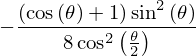

In [12]:
u11=hep.V3guchannel(p1,-1,p2,1,p3,-1,p4,-1)/uCM;u11

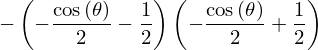

In [13]:
u12=hep.V4guchannel(p1,-1,p2,1,p3,-1,p4,-1);u12

In [14]:
simplify(u11+u12)

i.e. $T(g_-g_+\rightarrow g_-g_-)=0$

### 2) $T(g_-g_+\rightarrow g_-g_+)$

In [15]:
s21=hep.V3gschannel(p1,-1,p2,1,p3,-1,p4,1)/sCM;s21

In [16]:
s22=hep.V4gschannel(p1,-1,p2,1,p3,-1,p4,1);s22

i.e. $T^s(g_-g_+\rightarrow g_-g_+)=0$

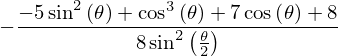

In [17]:
t21=hep.V3gtchannel(p1,-1,p2,1,p3,-1,p4,1)/tCM;t21

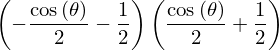

In [18]:
t22=hep.V4gtchannel(p1,-1,p2,1,p3,-1,p4,1);t22

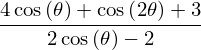

In [19]:
a1=simplify(t21+t22);a1

$a_1$ should be expressed by invariants. The proof of the following formula is easiest done by hand.

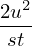

In [20]:
a1=2*u*u/t/s;a1

i.e. $T^t(g_-g_+\rightarrow g_-g_+)=\frac{2u^2}{ts}$

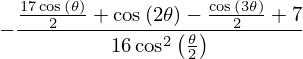

In [21]:
u21=hep.V3guchannel(p1,-1,p2,1,p3,-1,p4,1)/uCM;u21

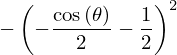

In [22]:
u22=hep.V4guchannel(p1,-1,p2,1,p3,-1,p4,1);u22

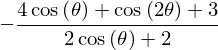

In [23]:
simplify(u21+u22)

In [24]:
a2=2*u/s;a2

i.e. $T^u(g_-g_+\rightarrow g_-g_+)=\frac{2u}{s}$

The following routine shows the nonvanishing color factors for $a=1$, which in python means $a=0$.

In [25]:
lamvec=[hep.lam1,hep.lam2,hep.lam3,hep.lam4,hep.lam5,hep.lam6,hep.lam7,hep.lam8]
a=0
ct=0
cu=0
cs=0
reslst=[]
#
for b in range(8):
    for c in range(8):
        for d in range(8):
            for i in range(8):
                ctm=hep.fsu3(a,c,i)*hep.fsu3(b,d,i)
                ct=ct+ctm
                cum=hep.fsu3(a,d,i)*hep.fsu3(b,c,i)
                cu=cu+cum
                csm=hep.fsu3(a,b,i)*hep.fsu3(c,d,i)
                cs=cs+csm
            if ct!=0 or cu!=0 or cs!=0:
                print(b+1,c+1,d+1,ct,cu,cs)
            ct=0
            cu=0
            cs=0

1 2 2 1 1 0
1 3 3 1 1 0
1 4 4 1/4 1/4 0
1 5 5 1/4 1/4 0
1 6 6 1/4 1/4 0
1 7 7 1/4 1/4 0
2 1 2 0 -1 1
2 2 1 -1 0 -1
2 4 5 1/4 -1/4 1/2
2 5 4 -1/4 1/4 -1/2
2 6 7 -1/4 1/4 -1/2
2 7 6 1/4 -1/4 1/2
3 1 3 0 -1 1
3 3 1 -1 0 -1
3 4 6 -1/4 1/4 -1/2
3 5 7 -1/4 1/4 -1/2
3 6 4 1/4 -1/4 1/2
3 7 5 1/4 -1/4 1/2
4 1 4 0 -1/4 1/4
4 2 5 1/2 1/4 1/4
4 3 6 -1/2 -1/4 -1/4
4 4 1 -1/4 0 -1/4
4 5 2 1/4 1/2 -1/4
4 6 3 -1/4 -1/2 1/4
4 6 8 -sqrt(3)/4 0 -sqrt(3)/4
4 8 6 0 -sqrt(3)/4 sqrt(3)/4
5 1 5 0 -1/4 1/4
5 2 4 -1/2 -1/4 -1/4
5 3 7 -1/2 -1/4 -1/4
5 4 2 -1/4 -1/2 1/4
5 5 1 -1/4 0 -1/4
5 7 3 -1/4 -1/2 1/4
5 7 8 -sqrt(3)/4 0 -sqrt(3)/4
5 8 7 0 -sqrt(3)/4 sqrt(3)/4
6 1 6 0 -1/4 1/4
6 2 7 -1/2 -1/4 -1/4
6 3 4 1/2 1/4 1/4
6 4 3 1/4 1/2 -1/4
6 4 8 -sqrt(3)/4 0 -sqrt(3)/4
6 6 1 -1/4 0 -1/4
6 7 2 -1/4 -1/2 1/4
6 8 4 0 -sqrt(3)/4 sqrt(3)/4
7 1 7 0 -1/4 1/4
7 2 6 1/2 1/4 1/4
7 3 5 1/2 1/4 1/4
7 5 3 1/4 1/2 -1/4
7 5 8 -sqrt(3)/4 0 -sqrt(3)/4
7 6 2 1/4 1/2 -1/4
7 7 1 -1/4 0 -1/4
7 8 5 0 -sqrt(3)/4 sqrt(3)/4
8 4 6 sqrt(3)/

All non vanishing squared matrix elements $|c_t T^t+c_u T^u|^2$ for $a=1$ are stored in the array reslst. The final result has to be multiplied by 8.

In [26]:
lamvec=[hep.lam1,hep.lam2,hep.lam3,hep.lam4,hep.lam5,hep.lam6,hep.lam7,hep.lam8]
a=0
ct=0
cu=0
#cs=0
reslst=[]
#
for b in range(8):
    for c in range(8):
        for d in range(8):
            for i in range(8):
                ctm=hep.fsu3(a,c,i)*hep.fsu3(b,d,i)
                ct=ct+ctm
                cum=hep.fsu3(a,d,i)*hep.fsu3(b,c,i)
                cu=cu+cum
                #csm=hep.fsu3(a,b,i)*hep.fsu3(c,d,i)
                #cs=cs+csm
            if ct!=0 or cu!=0:
                elm=a1*ct+a2*cu
                #a1print(b,c,d,ct,cu)
                reslst.append(elm*elm)
            ct=0
            cu=0

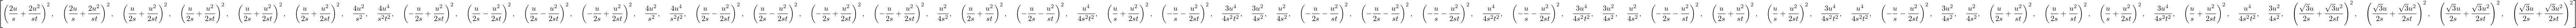

In [27]:
reslst

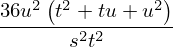

In [28]:
simplify(sum(reslst))

Using $2ut=s^2-t^2-u^2$ and multiplying by 8 we get the result for
$|T(g_-g_+\rightarrow g_-g_+)|^2$

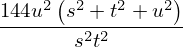

In [29]:
144*u*u*(s*s+t*t+u*u)/s/s/t/t

### 3)  $T(g_-g_+\rightarrow g_+g_-)$

In [30]:
s31=hep.V3gschannel(p1,-1,p2,1,p3,1,p4,-1)/sCM;s31

In [31]:
s32=hep.V4gschannel(p1,-1,p2,1,p3,1,p4,-1);s32

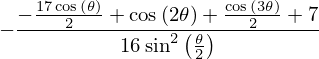

In [32]:
t31=hep.V3gtchannel(p1,-1,p2,1,p3,1,p4,-1)/tCM;t31

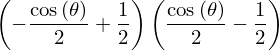

In [33]:
t32=hep.V4gtchannel(p1,-1,p2,1,p3,1,p4,-1);t32

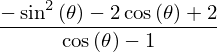

In [34]:
simplify(t31+t32)

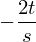

In [35]:
b1=-2*t/s;b1

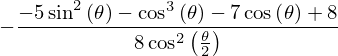

In [36]:
u31=hep.V3guchannel(p1,-1,p2,1,p3,1,p4,-1)/uCM;u31

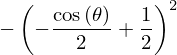

In [37]:
u32=hep.V4guchannel(p1,-1,p2,1,p3,1,p4,-1);u32

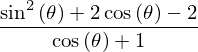

In [38]:
simplify(u31+u32)

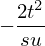

In [39]:
b2=-2*t *t/u/s;b2

In [40]:
lamvec=[hep.lam1,hep.lam2,hep.lam3,hep.lam4,hep.lam5,hep.lam6,hep.lam7,hep.lam8]
a=0
ct=0
cu=0
#cs=0
reslst=[]
#
for b in range(8):
    for c in range(8):
        for d in range(8):
            for i in range(8):
                ctm=hep.fsu3(a,c,i)*hep.fsu3(b,d,i)
                ct=ct+ctm
                cum=hep.fsu3(a,d,i)*hep.fsu3(b,c,i)
                cu=cu+cum
                #csm=hep.fsu3(a,b,i)*hep.fsu3(c,d,i)
                #cs=cs+csm
            if ct!=0 or cu!=0:
                elm=b1*ct+b2*cu
                #a1print(b,c,d,ct,cu)
                reslst.append(elm*elm)
            ct=0
            cu=0

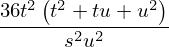

In [41]:
simplify(sum(reslst))

i.e. $|T(g_-g_+\rightarrow g_+g_-)|^2$ is given by

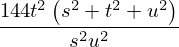

In [42]:
144*t*t*(s*s+t*t+u*u)/s/s/u/u

### 4)  $T(g_-g_+\rightarrow g_+g_+)$

In [43]:
s41=hep.V3gschannel(p1,-1,p2,1,p3,1,p4,1)/sCM;s41

In [44]:
s42=hep.V4gschannel(p1,-1,p2,1,p3,1,p4,1);s42

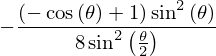

In [45]:
t41=hep.V3gtchannel(p1,-1,p2,1,p3,1,p4,1)/tCM;t41

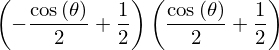

In [46]:
t42=hep.V4gtchannel(p1,-1,p2,1,p3,1,p4,1);t42

In [47]:
simplify(t41+t42)

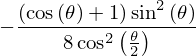

In [48]:
u41=hep.V3guchannel(p1,-1,p2,1,p3,1,p4,1)/uCM;u41

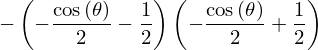

In [49]:
u42=hep.V4guchannel(p1,-1,p2,1,p3,1,p4,1);u42

In [50]:
simplify(u41+u42)

i.e.  $T(g_-g_+\rightarrow g_+g_+)=0$. 

Now follows the most complicated 3rd non vanishing amplitude

### 5) $T(g_-g_-\rightarrow g_-g_-)$

In [51]:
s51=hep.V3gschannel(p1,-1,p2,-1,p3,-1,p4,-1)/sCM;s51

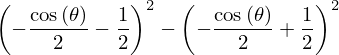

In [52]:
s52=hep.V4gschannel(p1,-1,p2,-1,p3,-1,p4,-1);s52

In [53]:
simplify(s51+s52)

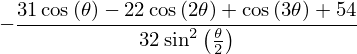

In [54]:
t51=hep.V3gtchannel(p1,-1,p2,-1,p3,-1,p4,-1)/tCM;t51

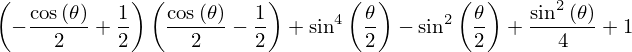

In [55]:
t52=hep.V4gtchannel(p1,-1,p2,-1,p3,-1,p4,-1);t52

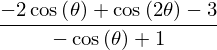

In [56]:
simplify(t51+t52)

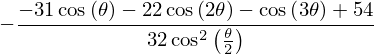

In [57]:
u51=hep.V3guchannel(p1,-1,p2,-1,p3,-1,p4,-1)/uCM;u51

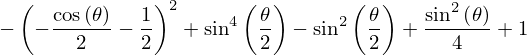

In [58]:
u52=hep.V4guchannel(p1,-1,p2,-1,p3,-1,p4,-1);u52

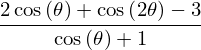

In [59]:
simplify(u51+u52)

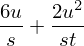

In [60]:
c1=2*u*u/t/s+6*u/s;c1

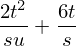

In [61]:
c2=2*t*t/u/s+6*t/s;c2

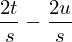

In [62]:
c3=-2*u/s+2*t/s;c3

In [63]:
lamvec=[hep.lam1,hep.lam2,hep.lam3,hep.lam4,hep.lam5,hep.lam6,hep.lam7,hep.lam8]
a=0
ct=0
cu=0
cs=0
reslst=[]
#
for b in range(8):
    for c in range(8):
        for d in range(8):
            for i in range(8):
                ctm=hep.fsu3(a,c,i)*hep.fsu3(b,d,i)
                ct=ct+ctm
                cum=hep.fsu3(a,d,i)*hep.fsu3(b,c,i)
                cu=cu+cum
                csm=hep.fsu3(a,b,i)*hep.fsu3(c,d,i)
                cs=cs+csm
            if ct!=0 or cu!=0 or cs!=0:
                elm=c1*ct+c2*cu+c3*cs
                #a1print(b,c,d,ct,cu)
                reslst.append(elm*elm)
            ct=0
            cu=0
            cs=0

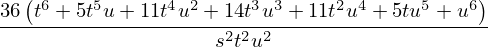

In [64]:
h3=simplify(sum(reslst));h3


In [65]:
h4=h3*s**2*t**2*u**2/36;h4

In [66]:
h5=simplify(h4.subs(t,-s-u));h5

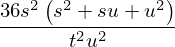

In [67]:
final=36*h5/s**2/t**2/u**2;final

i.e. $|T(g_-g_-\rightarrow g_-g_-)|^2$ is given by

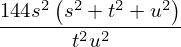

In [68]:
144*s*s*(s*s+t*t+u*u)/t**2/u**2

### 6) $T(g_-g_-\rightarrow g_-g_+)$

In [69]:
s61=hep.V3gschannel(p1,-1,p2,-1,p3,-1,p4,1)/sCM;s61

In [70]:
s62=hep.V4gschannel(p1,-1,p2,-1,p3,-1,p4,1);s62

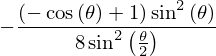

In [71]:
t61=hep.V3gtchannel(p1,-1,p2,-1,p3,-1,p4,1)/tCM;t61

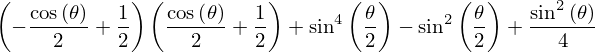

In [72]:
t62=hep.V4gtchannel(p1,-1,p2,-1,p3,-1,p4,1);t62

In [73]:
simplify(t61+t62)

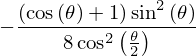

In [74]:
u61=hep.V3guchannel(p1,-1,p2,-1,p3,-1,p4,1)/uCM;u61

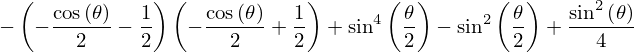

In [75]:
u62=hep.V4guchannel(p1,-1,p2,-1,p3,-1,p4,1);u62

In [76]:
simplify(u61+u62)

i.e. $T(g_-g_-\rightarrow g_-g_+)=0$

### 7) $T(g_-g_-\rightarrow g_+g_-)$

In [77]:
s71=hep.V3gschannel(p1,-1,p2,-1,p3,1,p4,-1)/sCM;s71

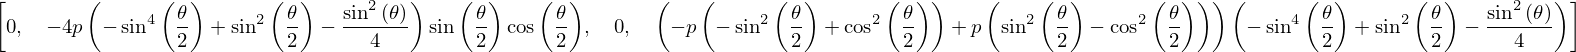

In [78]:
h2=hep.V3gOutOut(p3,1,p4,-1);h2

In [79]:
s72=simplify(hep.V4gschannel(p1,-1,p2,-1,p3,1,p4,-1));s72

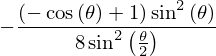

In [80]:
t71=hep.V3gtchannel(p1,-1,p2,-1,p3,1,p4,-1)/tCM;t71

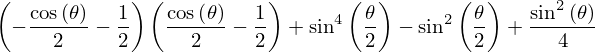

In [81]:
t72=hep.V4gtchannel(p1,-1,p2,-1,p3,1,p4,-1);t72

In [82]:
simplify(t71+t72)

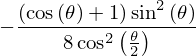

In [83]:
u71=hep.V3guchannel(p1,-1,p2,-1,p3,1,p4,-1)/uCM;u71

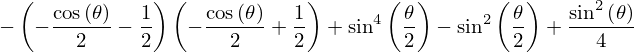

In [84]:
u72=hep.V4guchannel(p1,-1,p2,-1,p3,1,p4,-1);u72

In [85]:
simplify(u71+u72)

i.e. $T(g_-g_-\rightarrow g_+g_-)=0$

### 8) $T(g_-g_-\rightarrow g_+g_+)$

In [86]:
s81=hep.V3gschannel(p1,-1,p2,-1,p3,1,p4,1)/sCM;s81

In [87]:
s82=simplify(hep.V4gschannel(p1,-1,p2,-1,p3,1,p4,1));s82

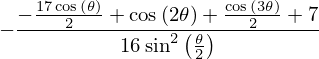

In [88]:
t81=hep.V3gtchannel(p1,-1,p2,-1,p3,1,p4,1)/tCM;t81

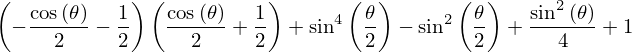

In [89]:
t82=hep.V4gtchannel(p1,-1,p2,-1,p3,1,p4,1);t82

In [90]:
simplify(t81+t82)

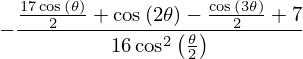

In [91]:
u81=hep.V3guchannel(p1,-1,p2,-1,p3,1,p4,1)/uCM;u81

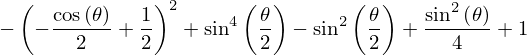

In [92]:
u82=hep.V4guchannel(p1,-1,p2,-1,p3,1,p4,1);u82

In [93]:
simplify(u81+u82)

i.e. $T(g_-g_-\rightarrow g_+g_+)=0$

## The cross section
Summing up the squared amplitudes, multiplying by 2 for the remaining 8 amplitudes, dividing by 4 for averaging over polarizations and dividing by 64 for averaging of colors we obtain the averaged sum of squared matrix elements

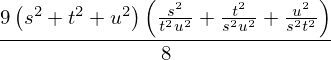

In [94]:
sig=(s**2/t**2/u**2+t**2/s**2/u**2+u**2/t**2/s**2)*(s**2+t**2+u**2)*9/8;sig

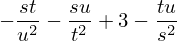

In [95]:
sigalt=(3-t*u/s**2-s*u/t**2-s*t/u**2);sigalt

In [96]:
h7=sig-sigalt*9/2
simplify(h7.subs(s,-t-u))